In [2]:
%matplotlib inline


# Demonstration of k-means assumptions

This example is meant to illustrate situations where k-means will produce
unintuitive and possibly unexpected clusters. In the first three plots, the
input data does not conform to some implicit assumption that k-means makes and
undesirable clusters are produced as a result. In the last plot, k-means
returns intuitive clusters despite unevenly sized blobs.


Automatically created module for IPython interactive environment


Text(0.5, 1.0, 'Incorrect Number of Blobs')

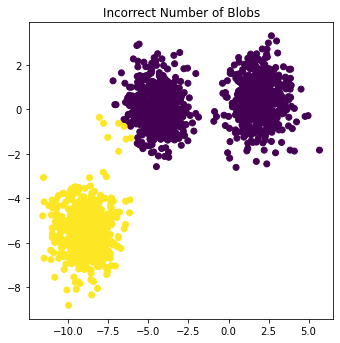

In [3]:
print(__doc__)

# Author: Phil Roth <mr.phil.roth@gmail.com>
# License: BSD 3 clause

import numpy as np
import matplotlib.pyplot as plt

from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

plt.figure(figsize=(12, 12))

n_samples = 1500
random_state = 170
X, y = make_blobs(n_samples=n_samples, random_state=random_state)

# Incorrect number of clusters
y_pred = KMeans(n_clusters=2, random_state=random_state).fit_predict(X)
plt.subplot(221)
plt.scatter(X[:, 0], X[:, 1], c=y_pred)
plt.title("Incorrect Number of Blobs")

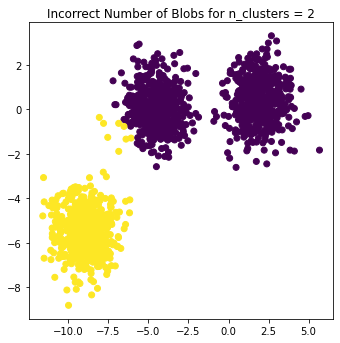

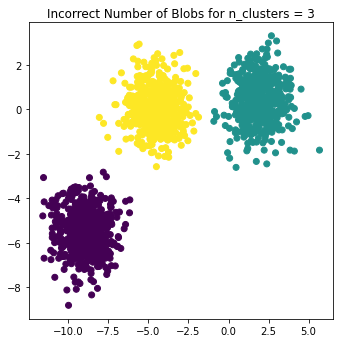

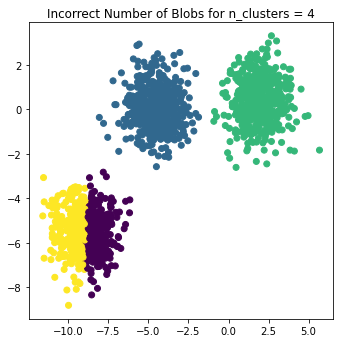

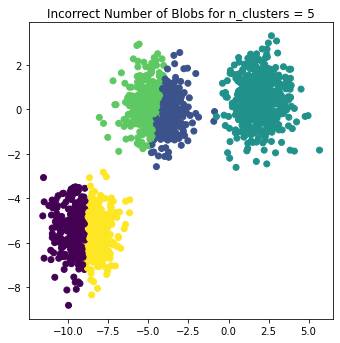

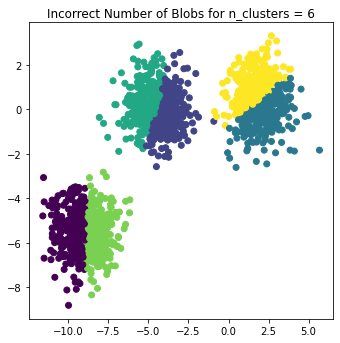

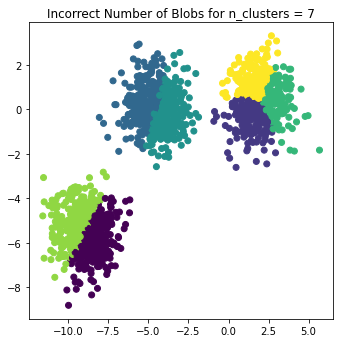

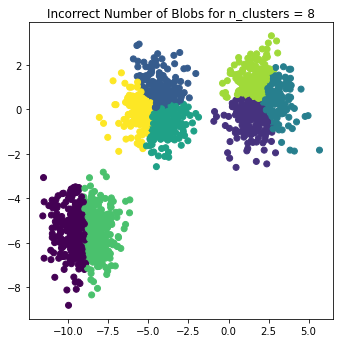

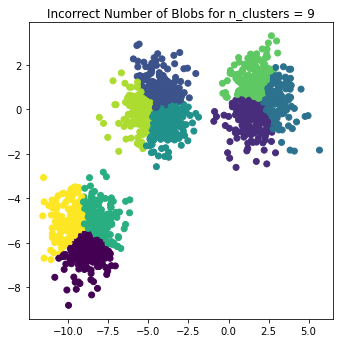

In [4]:
for k in range(2,10):
    y_pred = KMeans(n_clusters=k, random_state=random_state).fit_predict(X)
    plt.figure(figsize=(12, 12))
    plt.subplot(221)
    plt.scatter(X[:, 0], X[:, 1], c=y_pred)
    plt.title("Incorrect Number of Blobs for n_clusters = " + str(k))

## *In the above plots that are resulting into incorrect number of blobs, the input data does not conform to some implicit assumption that K-Means makes and hence undesirable clusters are produced as a result.*

In [5]:
import warnings
warnings.filterwarnings("ignore")

Text(0, 0.5, 'Inertia')

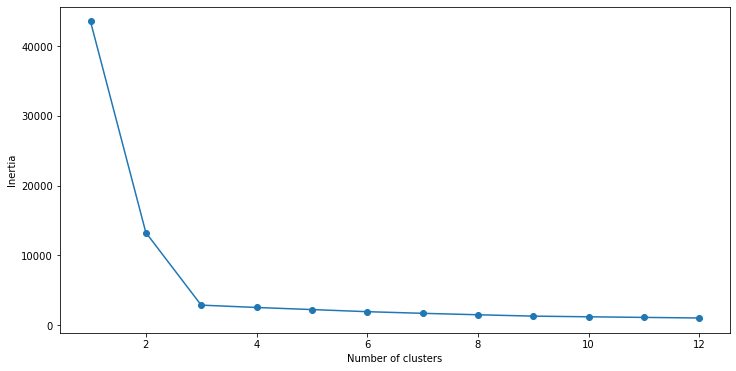

In [6]:
import pandas as pd
SSE = []
for cluster in range(1,13):
    KM = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    KM.fit(X)
    SSE.append(KM.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,13), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

## *inertia_ is the sum of squared distances of samples to their closest cluster center.*
## *Based on the above results, the best choice of number of clusters using elbow method is 3. So, Yes the elbow at the n_clusters value i.e. 3 is what I expected it to be.*

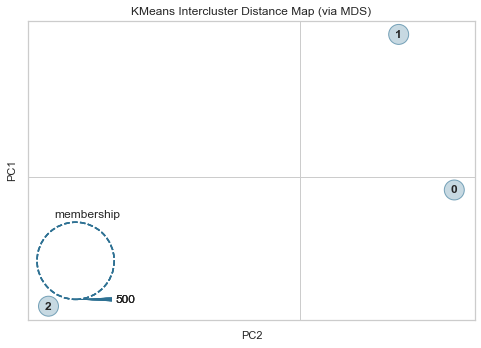

<AxesSubplot:title={'center':'KMeans Intercluster Distance Map (via MDS)'}, xlabel='PC2', ylabel='PC1'>

In [7]:
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

from yellowbrick.cluster import InterclusterDistance

# Generate synthetic dataset with 3 random clusters
X, y = make_blobs(n_samples=1500, random_state=170)

# Instantiate the clustering model and visualizer
model = KMeans(n_clusters=3, random_state=170)
visualizer = InterclusterDistance(model)

visualizer.fit(X)        # Fit the data to the visualizer
visualizer.show() 

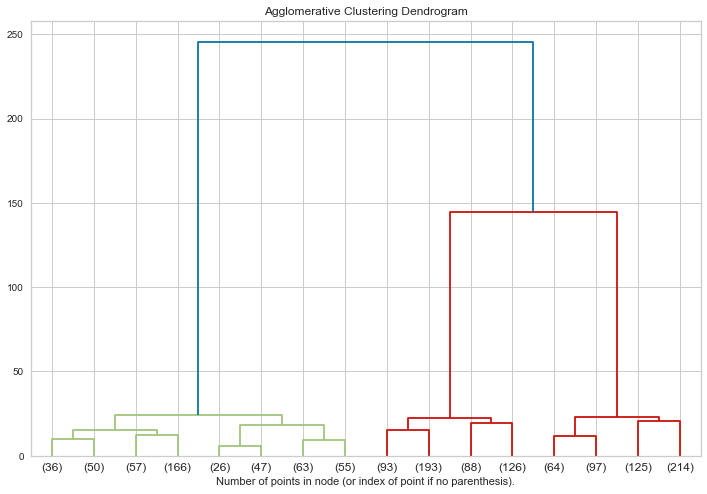

In [8]:
from scipy.cluster.hierarchy import dendrogram
from sklearn.cluster import AgglomerativeClustering

def plot_dendrogram(model, **kwargs):
    # Create linkage matrix and then plot the dendrogram

    # create the counts of samples under each node
    counts = np.zeros(model.children_.shape[0])
    n_samples = len(model.labels_)
    for i, merge in enumerate(model.children_):
        current_count = 0
        for child_idx in merge:
            if child_idx < n_samples:
                current_count += 1  # leaf node
            else:
                current_count += counts[child_idx - n_samples]
        counts[i] = current_count

    linkage_matrix = np.column_stack([model.children_, model.distances_,
                                      counts]).astype(float)

    # Plot the corresponding dendrogram
    dendrogram(linkage_matrix, **kwargs)
    
model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

model = model.fit(X)

plt.figure(figsize=(12,8))
plt.title('Agglomerative Clustering Dendrogram')
# plot the top three levels of the dendrogram
plot_dendrogram(model, truncate_mode='level', p=3)
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.show()

## *We can cut the dendogram at y = 100 to get the best clustering of the data. Cutting the dendogram at y = 100 would result into 3 clusters.* 
## *Also, we can cut the dendogram anywhere between approximately 25 and 148 to get the number of clusters equal to 3.*